In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-bvp-tpbvp)=
# Two-point BVP

The initial-value problems of {doc}`Chapter 6<../ivp/overview>` are characterized by an ordinary differential equation plus a value of the solution's state at one value of the independent variable.

In a **boundary-value problem**, the state is not entirely given at any point. Instead, partial information is given at multiple values of the independent variable. We will focus on the most common type.

::::{proof:definition} Two-point boundary-value problem (TPBVP)
:::{math}
:label: tpbvp
\begin{split}
u''(x) &= \phi(x,u,u'), \qquad a \le x \le b,\\
g_1(u(a),u'(a)) &= 0,\\
g_2(u(b),u'(b)) &= 0.
\end{split}
:::

This TPBVP is said to be **linear** if the dependence of $\phi$, $g_1$, and $g_2$ on the solution $u(x)$ is linear. Specifically, this means that 

:::{math}
\phi(x,u,u')=p(x)u' + q(x)u + r(x)
:::

for some coefficient functions $p$, $q$, and $r$, and $g_1$ and $g_2$ are linear in each of their arguments. 
::::

Often the domain of $x$ in {eq}`tpbvp` is not explicitly stated but is implied by the definitions of $g_1$ and $g_2$ These functions are called **boundary conditions**. An IVP for the same ODE as in {eq}`tpbvp` would specify values for both $u(a)$ and $u'(a)$. Although this may look like a minor change, IVPs and BVPs are quite different. Conceptually, the difference is like that between time and space. In a typical IVP, in which the independent variable is often time, the initial value determines everything about the future course of the solution. Even in a simple BVP, however, the necessary information is spread across the domain, and there may be more than one way to satisfy the boundary conditions.

Certain special cases of the boundary conditions have their own nomenclature.

```{index} ! Dirichlet boundary condition, ! Neumann boundary condition, ! Robin boundary condition
```

(definition-tpbvp-bctype)=
:::{proof:definition} Dirichlet, Neumann, and Robin conditions
Let $g_i$ be a boundary condition in {eq}`tpbvp`, and let $\alpha,\beta$ be constants.  

**Dirichlet condition:** $g_i(u,u') = u - \alpha$

**Neumann condition:** $g_i(u,u') = u' - \alpha$

**Robin condition:** $g_i(u,u') = u + \beta u' - \alpha$

When $\alpha=0$ in the above, the condition is said to be **homogeneous**.
:::

(example-tpbvp-pendulum)=
::::{proof:example}
An ideal pendulum of length $L$ satisfies the ODE $\theta'' + \frac{g}{L}\sin \theta = 0$, where $\theta(t)$ is the angle of the pendulum's rod from straight downward, and $g$ is gravitational acceleration.

If we pull the pendulum bob 1 radian and release it from rest, then we have an IVP with the initial condition $\theta(0)=1$, $\theta'(0)=0$. Everything about the future trajectory of the pendulum is completely determined by that condition. But if instead we want to know how far to pull up the pendulum bob initially so that it is in the downward position 2 seconds later, then we have the Neumann boundary condition $\theta'(0)=0$ and the Dirichlet boundary condition $\theta(2)=0$. 

Clearly, one solution is $\theta(0)=0$, and the pendulum never moves! But there is also an initial deflection such that $\theta(2)=0$ momentarily as the pendulum finishes its first downward swing. There could be still more solutions in which the pendulum completes one or more half-periods before passing again through the downward position at just the right moment. 
::::

While time can be the independent variable in a TPBVP, as in {numref}`Example {number} <example-tpbvp-pendulum>`, it is often space, which has no intrinsic direction of information flow.

(example-tpbvp-mems)=
::::{proof:example}
A micromechanical electrically driven actuator consists of two flat disk-shaped surfaces in parallel, one at $z=0$ and the other at $z=1$. The surface at $z=0$ is a rigid metal plate. The surface at $z=1$ is an elastic membrane fixed only at its boundary. When the surfaces are given different electric potentials, the membrane deflects in response to the induced electric field, and the field is also a position of the deflection. Assuming circular symmetry, one may derive the ordinary differential equation {cite}`peleskoEffectSmallaspectratio2006`

:::{math}
:label: mems
\frac{d^2w}{d r^2} + \frac{1}{r}\, \frac{d w}{d r} = \frac{\lambda}{w^2},
:::

where $w(r)$ is the vertical position of the membrane at radius $r$, and $\lambda$ is proportional to the applied electric potential. We will use $0\le r\le 1$. There are also the supplemental physical conditions

:::{math}
:label: memsbc
w'(0)=0, \qquad w(1)=1,
:::

derived from the circular symmetry and fixing the edge of the membrane, respectively. This is a nonlinear boundary-value problem. The solution should respect $0<w(r)\le 1$ in order to be physically meaningful.
::::

## Numerical solution

We can solve the TPBVP {eq}`tpbvp` by recasting the problem as a first-order system in the usual way. 

(demo-tpbvp-mems)=
:::{proof:demo}
:::

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

```{index} ! Julia; in-place function
```

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
As a system, the MEMS problem from {numref}`Example {number} <example-tpbvp-mems>` uses $y_1=w$, $y_2=w'$ to obtain

:::{math}
:label: memssys
\begin{split}
y_1' &= y_2, \\
y_2' &= \frac{\lambda}{y_1^2} - \frac{y_2}{r}.
\end{split}
:::

We will code an *in-place* form of this ODE, in which the first argument is used to return the computed values of $y_1'$ and $y_2'$.  

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
The in-place code here saves the computing time that would otherwise be needed to allocate memory for `f` repeatedly.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [2]:
function ode!(f,y,λ,r)
    f[1] = y[2]
    f[2] = λ/y[1]^2 - y[2]/r
end;

Notice that no `return` statement is needed with the in-place style. We use the same style for the boundary conditions $y_2(0)=0$, $y_1(2)=1$.

In [3]:
function bc!(g,y,λ,r)
    g[1] = y(0)[2]
    g[2] = y(1)[1] - 1
end;

In the `bc!` function, the `y` argument is just like an IVP solution from {numref}`section-ivp-basics`. Thus, `y(0)` is the value of the solution at $x=0$, and the second component of that value is what we wish to make zero. Similarly, `y(1)[1]` is the notation for $y_1(1)$, which is supposed to equal 1. 

The domain of the mathematical problem is $r\in [0,1]$. However, there is a division by $r$ in the ODE, so we want to avoid $r=0$ by truncating the domain a bit.

In [4]:
domain = (eps(),1.0)

(2.220446049250313e-16, 1.0)

We need one last ingredient that is not part of the mathematical setup: an initial estimate for the solution. As we will see, this plays the same role as initialization in Newton's method for rootfinding. Here, we try a constant value for each component.

In [5]:
est = [1,0]

2-element Vector{Int64}:
 1
 0

Now we set up and solve a `BVProblem` with the parameter value $\lambda=0.6$.

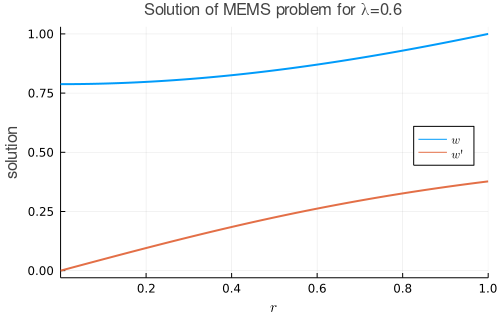

In [6]:
bvp = BVProblem(ode!,bc!,est,domain,0.6)
y = solve(bvp)
plot(y,label=[L"w" L"w'"],legend=:right,
    xlabel=L"r",ylabel="solution",
    title="Solution of MEMS problem for λ=0.6")

To visual accuracy, the boundary conditions have been enforced.

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

Characterizing the conditioning of a TPBVP theoretically is difficult. There are some numerical tools going by the name  *sensitivity analysis*, but the details are too lengthy for us to explore here.

## Exercises

```{index} Bessel equation, Carrier equation
```
1. ✍ In each case, explain whether the TPBVP is linear or nonlinear.  

    **(a)** $x^2 u'' +xu' + (x^2 - 1) u = 0, \quad u(0) =1,\; u(4) =0 \qquad$ *(Bessel equation)*

    **(b)** $u'' - u u' = 1, \quad u(0) = u'(1) = 1$

    **(c)** $u'' + u = 1, \quad u(0) = u(1) u'(1) = 1$

    **(d)** $\epsilon u'' +2(1-x^2) u +u^2  = 1, \quad u(-1) = u(1) = 0 \qquad$ *(Carrier equation {cite}`carrierSingularPerturbation1970`)*

	**(e)** $u u'' = 3(u')^2, \quad u(-1) = 1, \; u(2) = \frac{1}{2}$

    ```{index} Hermite equation, Laguerre equation, Chebyshev equation, Legendre equation
    ```

    (problem-tpbvp-verify)=
2. ✍ For each BVP, verify that the given solution is valid, i.e., check that the differential equation and the boundary conditions are satisfied.

    **(a)** $u'' - 2xu' + 8 u = 0, \quad u(0) = 1, \; u(1) = -\frac{5}{3}\qquad$ *(Hermite equation)* 

    Solution: $u(x) = \frac{4}{3}x^4-4x^2+1$

    **(b)** $xu'' + (1-x) u' + 3 u = 0, \quad u(0) =1, \; u'(1) =-\frac{1}{2} \qquad$ *(Laguerre equation)*

    Solution: $u(x) = \frac{1}{6}(6-18x+9x^2-x^3)$

    **(c)** $(1-x^2)u'' - xu' + 25u = 0, \quad u'(0) = 5, \; u\left(\frac{1}{2}\right) = \frac{1}{2} \qquad$ *(Chebyshev equation)*

    Solution: $u(x) = T_5(x) = 16x^5-20x^3+5x$ 

    **(d)** $(1-x^2) u'' -2xu' + 12 u = 0, \quad u(0)+2u'(0) = -3, \; u(1) = 1 \qquad$ *(Legendre equation)*

    Solution: $u(x) = P_3(x) = \frac{1}{2}(5x^3-3x)$ 

    **(e)** $u u'' = 3(u')^2, \quad u(-1) = 1, \; u(2) = \frac{1}{2}$ 

    Solution: $u(x) =  ( x+2 )^{-1/2}$

3. ⌨ For each TPBVP in Exercise 2, use `solve` to find the solution. Plot the solution and separately plot the error as a function of $x$. (In some cases you will need to truncate the domain to avoid division by zero.)

    (problem-tpbvp-pendulum)=
4. ⌨ Consider the pendulum from {numref}`Example {number} <example-tpbvp-pendulum>` with $g=L=1$. Suppose we want to release the pendulum from rest such that $\theta(5)=\pi/2$. Find one solution that passes through $\theta=0$ and another solution that does not. Plot $\theta(t)$ for both cases together. (Hint: Vary the initial estimate for the solution.)

    ```{index} Allen–Cahn equation
    ```
    (problem-tpbvp-allencahn)=
5. ⌨  The *stationary Allen–Cahn equation* is a model of phase changes, such as the change from liquid to solid. In one spatial dimension it can be written as

    $$
      \epsilon u'' = u^3-u, \qquad 0 \le x \le 1, \qquad u(0)=-1, \quad u(1)=1.
    $$

    As $\epsilon\rightarrow 0$, the solution tends toward a step function transition between $-1$ and $1$. By symmetry, $u'(x)=-u'(1-x)$.
  
    **(a)** Use {numref}`Function {number} <function-shoot>` with initial solution estimates $(u=-1,u'=0)$ to solve the equation for $\epsilon=0.2$. Plot the solution.

    **(b)** Repeat part (a) for $\epsilon=0.02$.
    
    **(c)** Repeat part (a) for $\epsilon=0.002$. (This is a difficult problem for the default method.) Try a few different initializations for $u$, and plot all the results. Do any seem to be valid solutions of the BVP?